# Southern Ocean ONE STEP eddy tracking

The objective of this script is to track the eddies in the Southern Ocean.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

(<matplotlib.figure.Figure at 0x7f8740eda7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8740e742b0>)

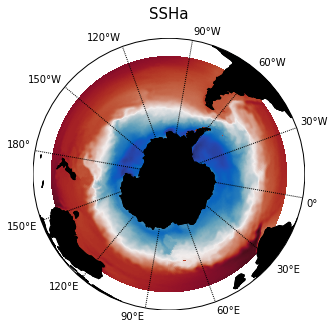

In [4]:
basemap_mplot(lon,lat,ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=1,yan=1,figsize=(5,5),fontsize=15)

In [5]:
###This mask is necessary to remask each time step, 
#It's not necesary if your mask is good in all the time steps
mask=ma.getmask(eta[0,:,:])

## Analysis in just one level  

To extract or analyse the data in just one time step use the following two examples:

* **Possitive eddy tracking**
* **Negative eddy tracking**


In [6]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

#### Possitive eddy tracking

In [7]:
eddytd=analyseddyt(eta,lon,lat,level=10,t0=0,t1=1,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 14 s  

#### Negative eddy tracking

In [8]:
eddytdn=analyseddyt(eta,lon,lat,level=-10,t0=0,t1=1,tstep=1,data_meant=ssh_mean,\
                   areamap=areamap,mask='',destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 11 s  

### Removing eddies from eddy field or any other variable.

In [9]:
# SSHa Field used to extract eddies
ssha=eta[0,:,:]-ssh_mean

In [10]:
#This threshold will let you grow the domine around the eddy contour.
threshold=1
# Function that removes the eddies
## Positive remotion
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [11]:
## Negative remotion
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


### Ploting removed data in beautiful maps

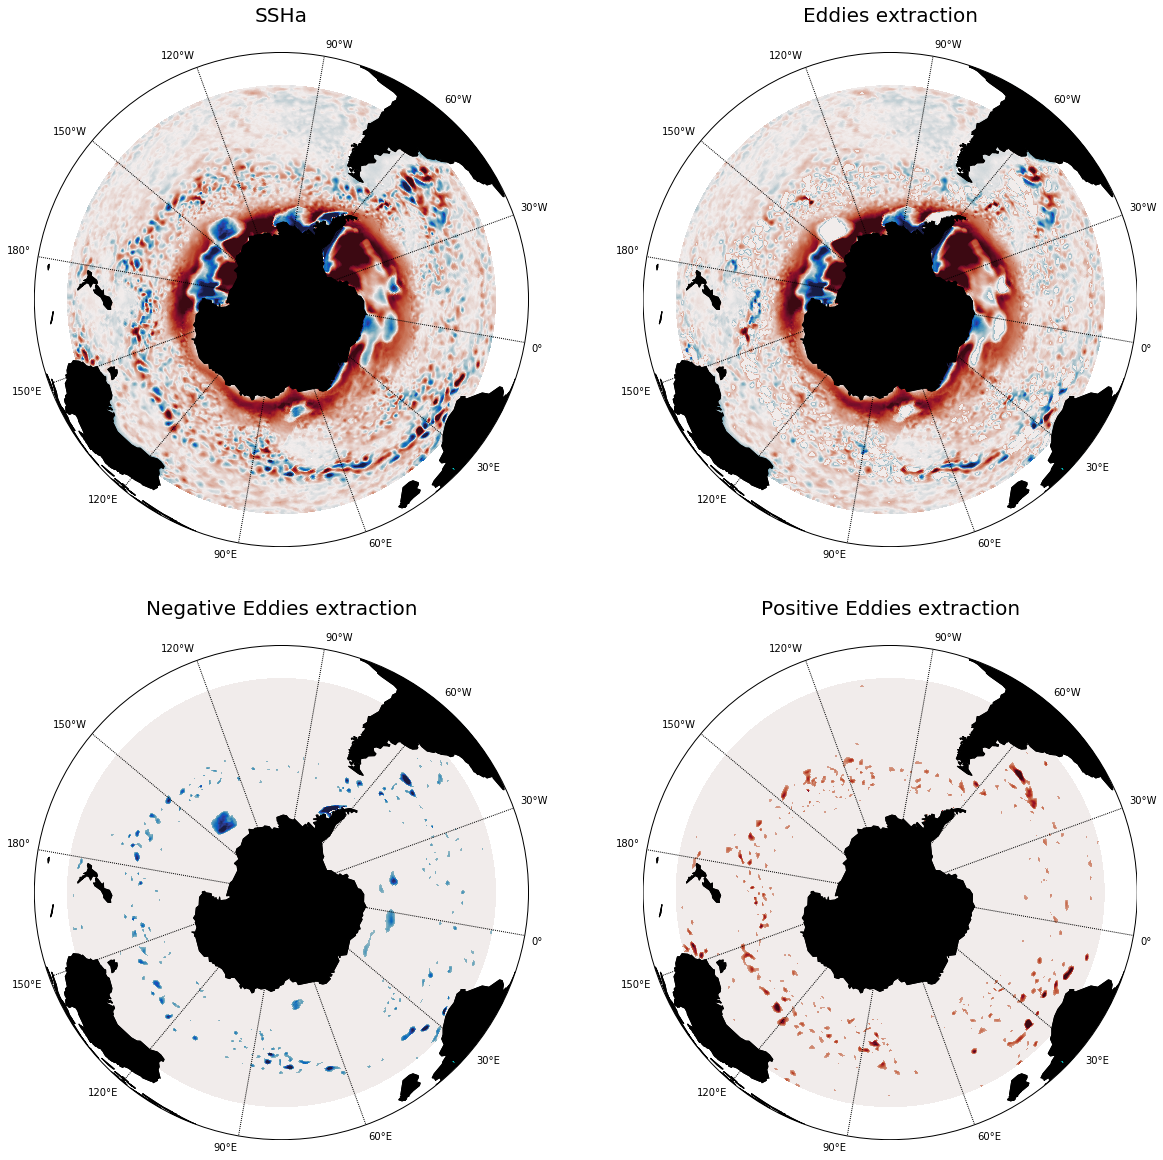

In [12]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);

# Analysis of eddies scanning in d$\eta$

In [13]:
eddytd=analyseddyzt(eta,lon,lat,0,1,1,50,1,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 435 s  

In [14]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


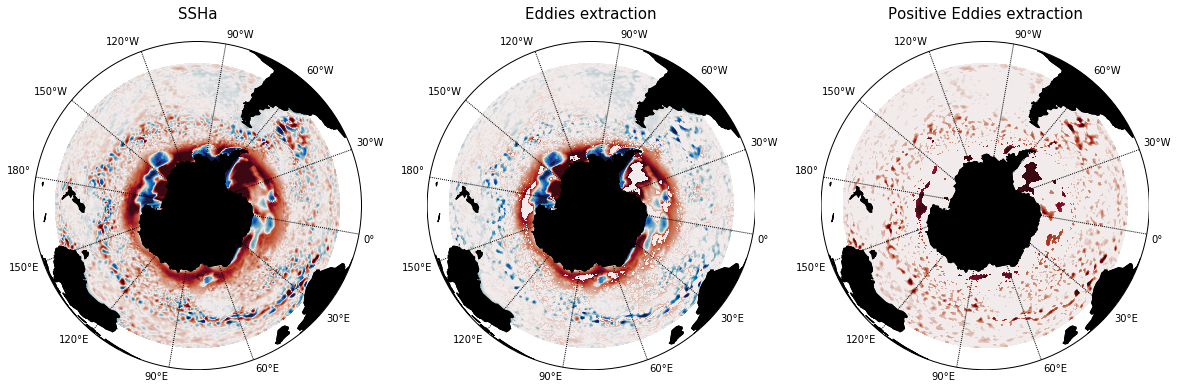

In [15]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot,eddysplot]\
              ,title=["SSHa","Eddies extraction",
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [16]:
eddytdn=analyseddyzt(eta,lon,lat,0,1,1,-1,-50,1,data_meant=ssh_mean,areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

 0% [>]100% Time Elapsed: 378 s  otal of eddies: 450 - Level: -1.0    

In [17]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


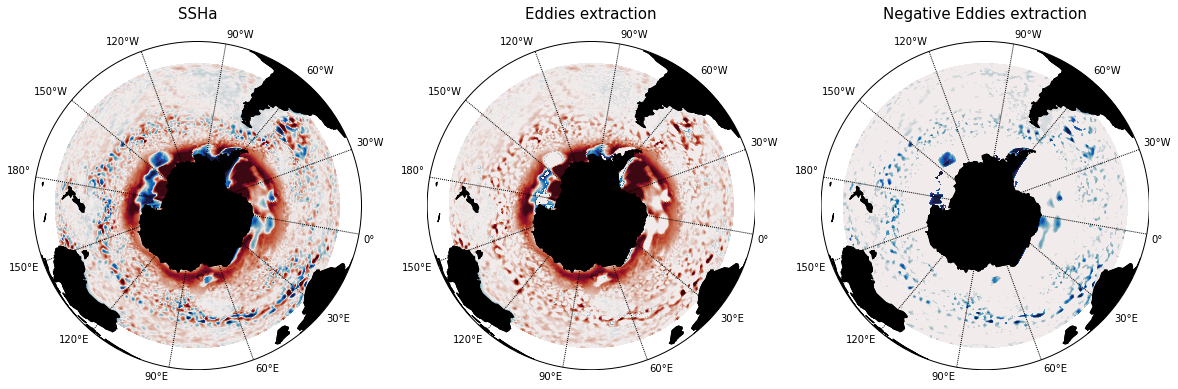

In [18]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplotn,eddysplotn]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=1,yan=3,figsize=(20,20),fontsize=15);

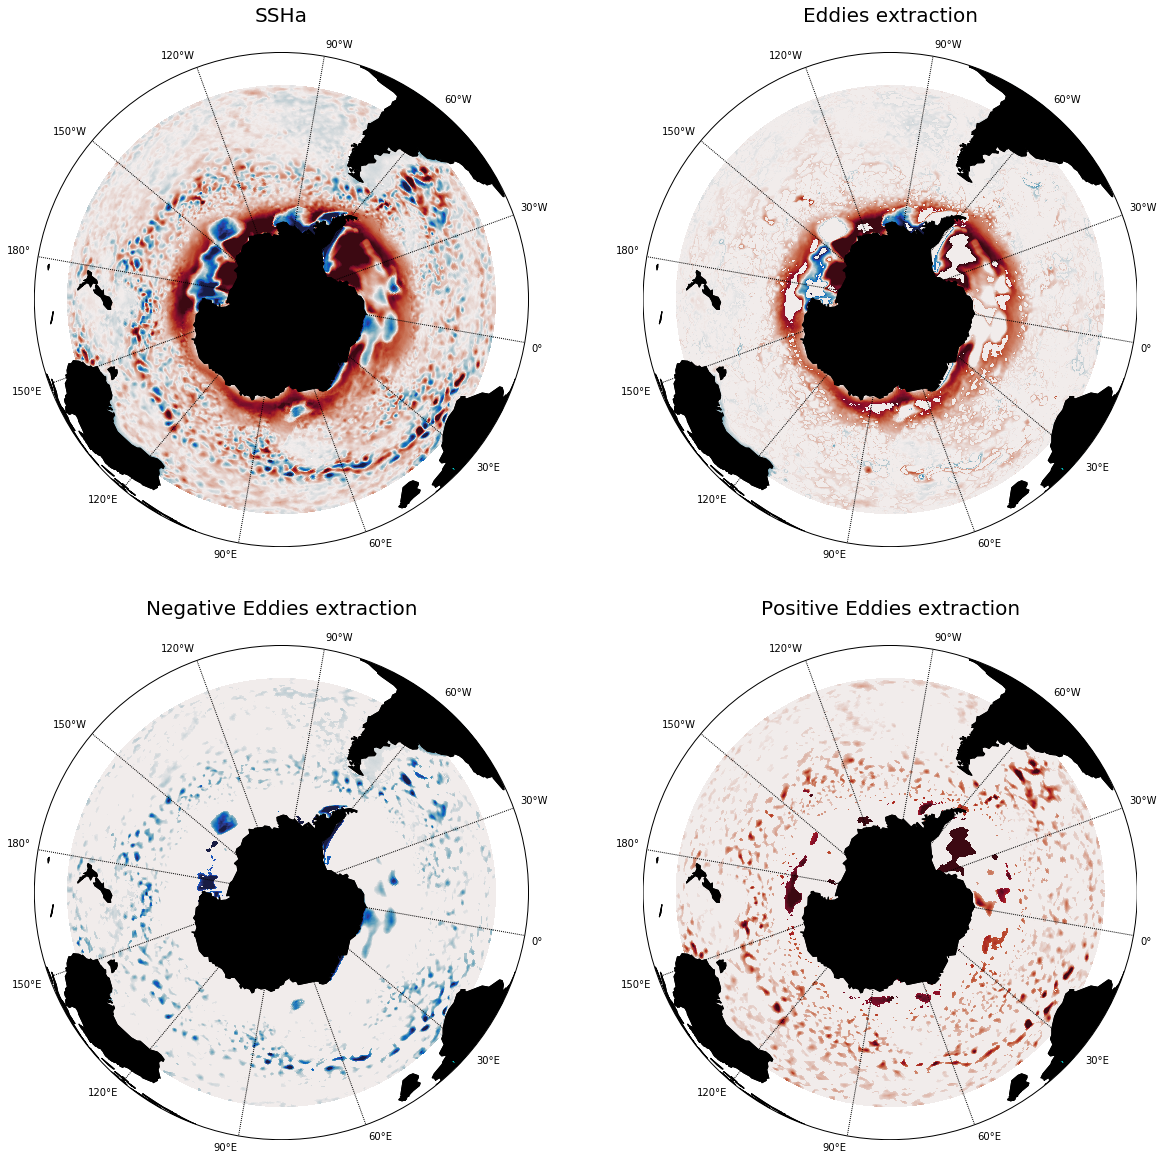

In [19]:
basemap_mplot(lon,lat,[ssha,ssha-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction",\
                       "Positive Eddies extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,20),fontsize=20);
plt.savefig('../output/eddy_removal.jpg', bbox_inches='tight')

In [20]:
Check monthly averages

SyntaxError: invalid syntax (<ipython-input-20-0c01d2379a5a>, line 1)